<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
# !pip install pandas

In [ ]:
# !pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv -o survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  152M    1 2600k    0     0  1375k      0  0:01:53  0:00:01  0:01:52 1377k
 14  152M   14 22.8M    0     0  8081k      0  0:00:19  0:00:02  0:00:17 8085k
 17  152M   17 26.2M    0     0  6916k      0  0:00:22  0:00:03  0:00:19 6920k
 20  152M   20 31.6M    0     0  6627k      0  0:00:23  0:00:04  0:00:19 6629k
 22  152M   22 34.1M    0     0  5939k      0  0:00:26  0:00:05  0:00:21 7017k
 25  152M   25 38.3M    0     0  5703k      0  0:00:27  0:00:06  0:00:21 7340k
 30  152M   30 46.4M    0     0  6029k      0  0:00:25  0:00:07  0:00:18 4844k
 37  152M   37 56.3M    0     0  6488k      0  0:00:24  0:00:08  0:00:16 6156k
 44  152M   44 67.6M    0     0  7004k      0  0:00

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [2]:
## Write your code here
filtered = df['ConvertedCompYearly']
filtered = filtered.dropna()
filtered

72         7322.0
374       30074.0
379       91295.0
385       53703.0
389      110000.0
           ...   
41180     44640.0
41184    170000.0
41185    116844.0
41186     12000.0
41187    222834.0
Name: ConvertedCompYearly, Length: 23435, dtype: float64

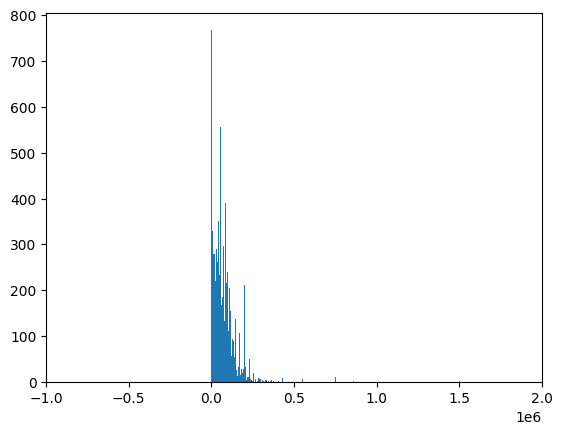

In [7]:
plt.hist(filtered,bins=10000)
plt.xlim(-0.1e7,0.2e7)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [9]:
def get_age_midpoint(age_range):
    if age_range == 'Under 18 years old':
        return 17  # Assuming average of 0-17
    elif age_range == '65 years or older':
        return 75  # Assuming average of 65-85
    elif age_range == 'Prefer not to say':
        return None
    else:
        ages = [int(x) for x in age_range.split()[0].split('-')]
        return sum(ages) / 2

In [10]:
## Write your code here
df['Age_numeric'] = df['Age'].apply(get_age_midpoint)
df['Age_numeric']

0        17.0
1        39.5
2        49.5
3        21.0
4        21.0
         ... 
65432    21.0
65433    29.5
65434    29.5
65435    21.0
65436    21.0
Name: Age_numeric, Length: 65437, dtype: float64

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [11]:
## Write your code here
filtered = df[['Age_numeric', 'ConvertedCompYearly']]
filtered = filtered.dropna()
filtered

,Age_numeric,ConvertedCompYearly
72,21.0,7322.0
374,29.5,30074.0
379,39.5,91295.0
385,39.5,53703.0
389,29.5,110000.0
...,...,...
41180,29.5,44640.0
41184,49.5,170000.0
41185,39.5,116844.0
41186,21.0,12000.0


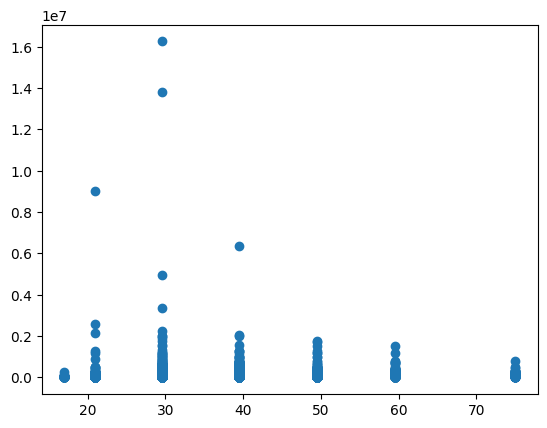

In [14]:
plt.scatter(x='Age_numeric', y='ConvertedCompYearly', data=filtered)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


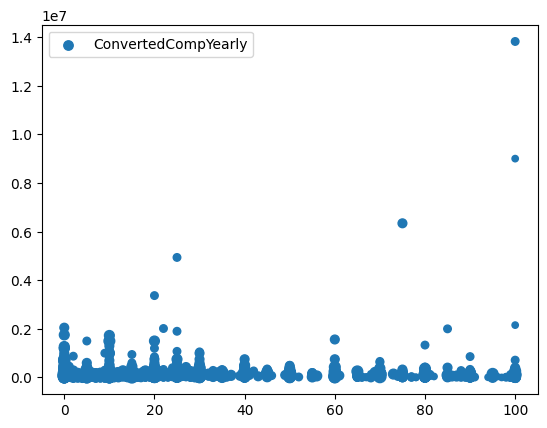

In [18]:
## Write your code here
filtered = df[['Age_numeric', 'ConvertedCompYearly', 'JobSatPoints_6']]
filtered = filtered.dropna()
plt.scatter(x='JobSatPoints_6', y='ConvertedCompYearly', s='Age_numeric', data=filtered)
plt.legend()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [20]:
## Write your code here
filtered = df[['MainBranch']]
filtered = filtered.dropna()
filtered = filtered.groupby(['MainBranch'])['MainBranch'].count().to_frame().rename(columns={'MainBranch': 'Counts'}).reset_index()

filtered

,MainBranch,Counts
0,I am a developer by profession,50207
1,I am learning to code,3875
2,"I am not primarily a developer, but I write co...",6511
3,I code primarily as a hobby,3334
4,"I used to be a developer by profession, but no...",1510


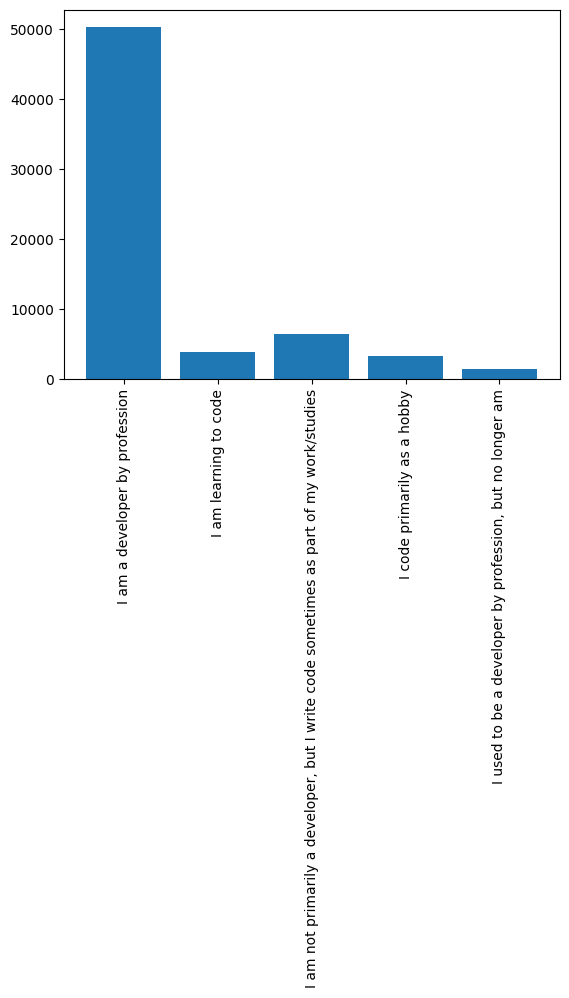

In [23]:
plt.bar(x='MainBranch', height='Counts', data=filtered)
plt.xticks(rotation=90)
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [25]:
## Write your code here
filtered = df[['LanguageWantToWorkWith']]
filtered = filtered.dropna()
filtered = filtered.groupby(['LanguageWantToWorkWith'])['LanguageWantToWorkWith'].count().to_frame().rename(columns={'LanguageWantToWorkWith': 'Counts'}).reset_index()

filtered = filtered.sort_values(by='Counts', ascending=False).head(20)
filtered

,LanguageWantToWorkWith,Counts
22594,Python,922
22712,Rust,737
21149,HTML/CSS;JavaScript;TypeScript,632
9833,C#,538
19143,Go,460
21520,Java,331
12224,C#;HTML/CSS;JavaScript;SQL;TypeScript,317
22649,Python;SQL,312
22627,Python;Rust,300
22138,JavaScript;TypeScript,280


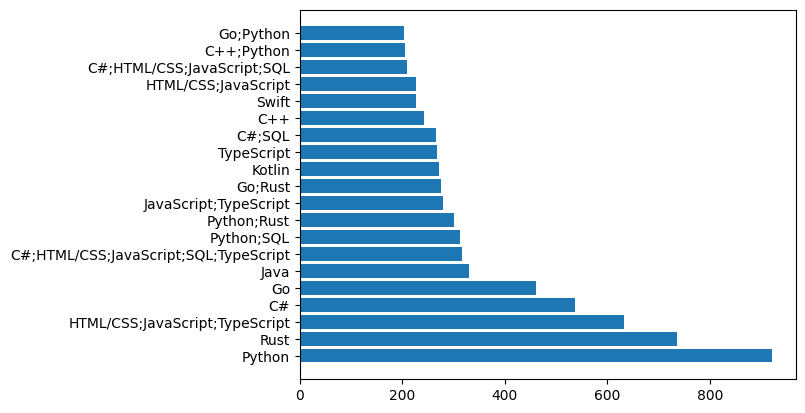

In [31]:
plt.barh(y='LanguageWantToWorkWith', width='Counts', data=filtered)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [33]:
## Write your code here
filtered = df[['JobSatPoints_6','JobSatPoints_7','Age']]
filtered = filtered.dropna()
filtered = filtered.groupby(['Age'])[['JobSatPoints_6','JobSatPoints_7']].median().reset_index()
filtered

,Age,JobSatPoints_6,JobSatPoints_7
0,18-24 years old,15.0,20.0
1,25-34 years old,20.0,15.0
2,35-44 years old,20.0,15.0
3,45-54 years old,20.0,15.0
4,55-64 years old,20.0,20.0
5,65 years or older,20.0,15.0
6,Prefer not to say,10.0,7.0
7,Under 18 years old,1.5,5.0


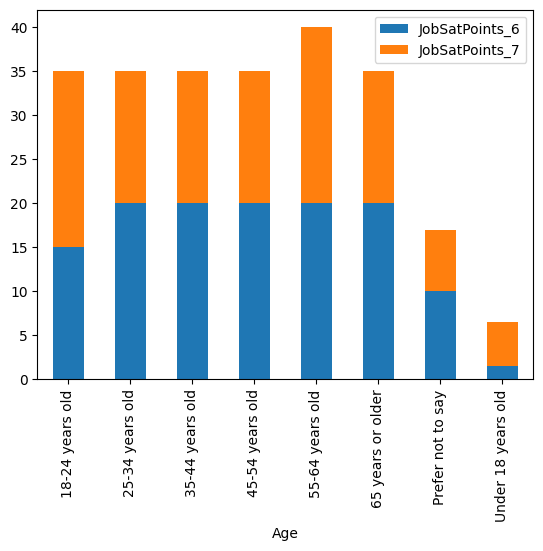

In [35]:
filtered.plot(kind='bar', stacked=True, x='Age', y=['JobSatPoints_6', 'JobSatPoints_7'])
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [36]:
## Write your code here
filtered = df[['DatabaseHaveWorkedWith']]
filtered = filtered.dropna()
filtered = filtered.groupby(['DatabaseHaveWorkedWith'])['DatabaseHaveWorkedWith'].count().to_frame().rename(columns={'DatabaseHaveWorkedWith': 'Counts'}).reset_index()

filtered = filtered.sort_values(by='Counts', ascending=False).head(20)
filtered

,DatabaseHaveWorkedWith,Counts
8998,PostgreSQL,3216
8574,Microsoft SQL Server,2239
8875,MySQL,2099
9039,SQLite,1762
9013,PostgreSQL;SQLite,1172
8753,MongoDB,986
8951,MySQL;SQLite,713
8914,MySQL;PostgreSQL,706
8373,MariaDB;MySQL,634
9003,PostgreSQL;Redis,615


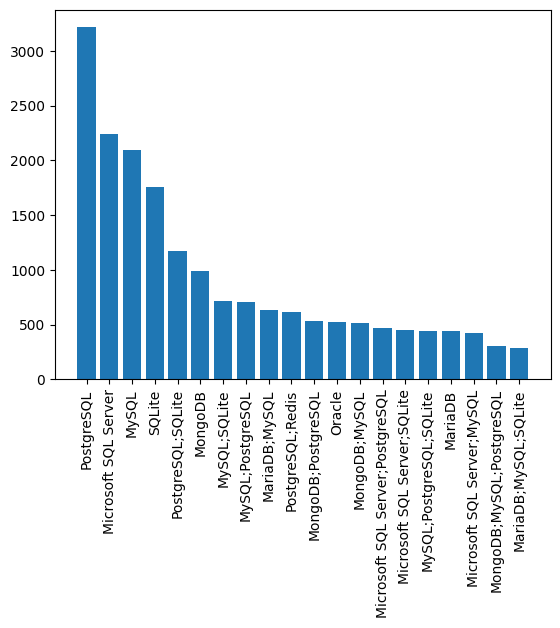

In [37]:
plt.bar(x='DatabaseHaveWorkedWith', height='Counts', data=filtered)
plt.xticks(rotation=90)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [38]:
## Write your code here
filtered = df[['ConvertedCompYearly','Age']]
filtered = filtered.dropna()
filtered = filtered.groupby(['Age'])[['ConvertedCompYearly']].median().reset_index()
filtered

,Age,ConvertedCompYearly
0,18-24 years old,25000.0
1,25-34 years old,59825.0
2,35-44 years old,84796.0
3,45-54 years old,99099.0
4,55-64 years old,109691.0
5,65 years or older,106000.0
6,Prefer not to say,140000.0
7,Under 18 years old,7626.5


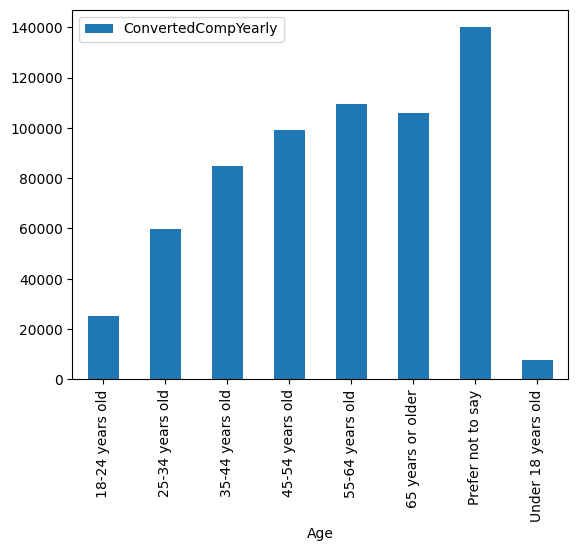

In [40]:
filtered.plot(kind='bar', x='Age', y='ConvertedCompYearly')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [41]:
## Write your code here
filtered = df[['Country']]
filtered = filtered.dropna()
filtered = filtered.groupby(['Country'])['Country'].count().to_frame().rename(columns={'Country': 'Counts'}).reset_index()

filtered

,Country,Counts
0,Afghanistan,56
1,Albania,49
2,Algeria,77
3,Andorra,15
4,Angola,20
...,...,...
180,"Venezuela, Bolivarian Republic of...",69
181,Viet Nam,296
182,Yemen,18
183,Zambia,15


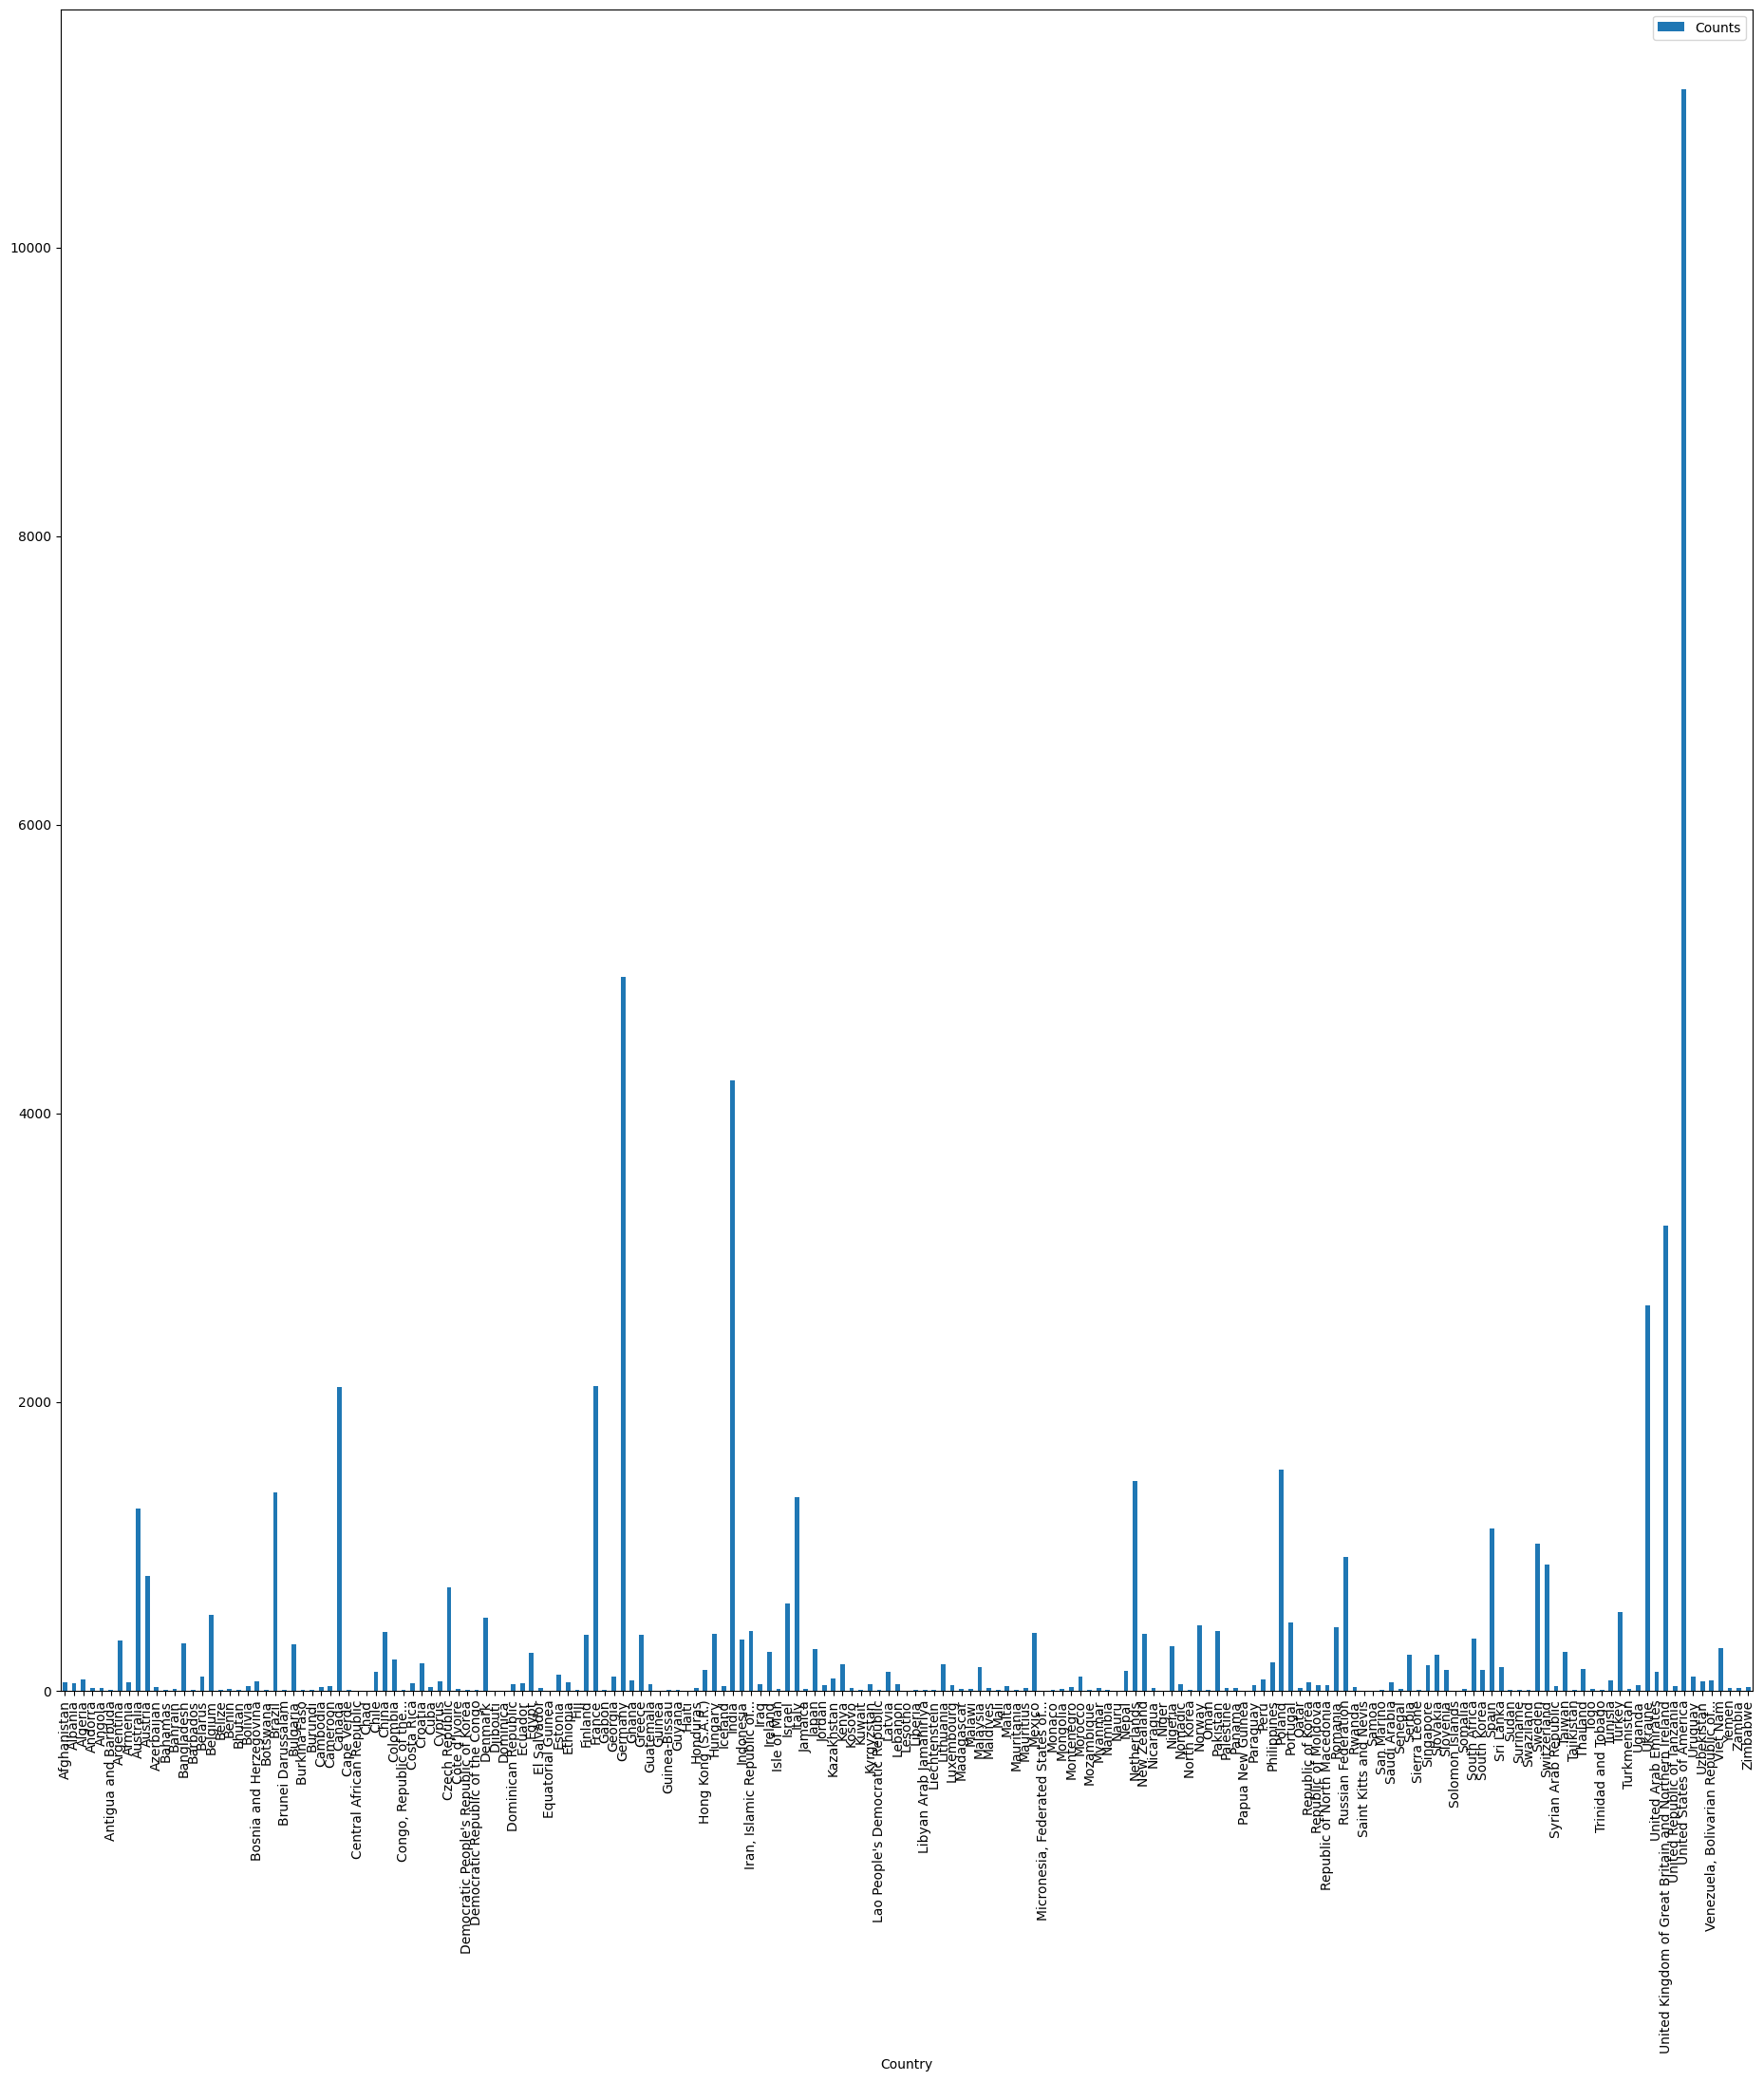

In [44]:
filtered.plot(kind='bar', x='Country', y='Counts', figsize=(23,23))
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
